In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget
from sklearn.datasets import make_blobs
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
np.set_printoptions(precision=2)
from lab_utils_multiclass_TF import *
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

Build a multiclass network in TF!

In [3]:
classes = 4
m = 100
centers = [[-5, 2], [-2, -2], [1, 2], [5, -2]]
std = 1.0

X_train, y_train = make_blobs(n_samples=m, centers=centers, cluster_std=std, random_state=30)

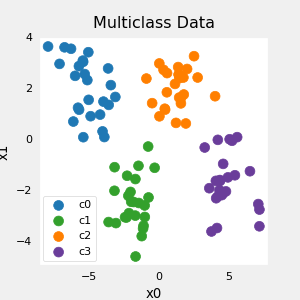

In [4]:
plt_mc(X_train, y_train, classes, centers, std=std)

In [5]:
print(f"Unique classes: {np.unique(y_train)}")
print(f"Class representation: {y_train[:10]}")
print(f"X_train.shape: {X_train.shape}\t\ty_train.shape: {y_train.shape}")

Unique classes: [0 1 2 3]
Class representation: [3 3 3 0 3 3 3 3 2 0]
X_train.shape: (100, 2)		y_train.shape: (100,)


To model, use a 2-layer network. 4 neurons in final layer, 1 per class.
Output with highest value is the predicted class.

In [7]:
tf.random.set_seed(1234)
model = Sequential([
    Dense(2, activation='relu', name='L1'),
    Dense(4, activation='linear', name='L2')
])

model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(1e-2)
)

model.fit(
    X_train,
    y_train,
    epochs=200
)

2022-07-13 03:01:59.129835: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-07-13 03:01:59.146456: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 3693405000 Hz


Epoch 1/200
4/4 [==============================] - 0s 5ms/step - loss: 1.8136
Epoch 2/200
4/4 [==============================] - 0s 2ms/step - loss: 1.7196
Epoch 3/200
4/4 [==============================] - 0s 2ms/step - loss: 1.6421
Epoch 4/200
4/4 [==============================] - 0s 2ms/step - loss: 1.5740
Epoch 5/200
4/4 [==============================] - 0s 1ms/step - loss: 1.4514
Epoch 6/200
4/4 [==============================] - 0s 2ms/step - loss: 1.4074
Epoch 7/200
4/4 [==============================] - 0s 6ms/step - loss: 1.3158
Epoch 8/200
4/4 [==============================] - 0s 2ms/step - loss: 1.2721
Epoch 9/200
4/4 [==============================] - 0s 2ms/step - loss: 1.2249
Epoch 10/200
4/4 [==============================] - 0s 1ms/step - loss: 1.2049
Epoch 11/200
4/4 [==============================] - 0s 2ms/step - loss: 1.1549
Epoch 12/200
4/4 [==============================] - 0s 1ms/step - loss: 1.1149
Epoch 13/200
4/4 [==============================] - 0s 1ms/st

Epoch 104/200
4/4 [==============================] - 0s 1ms/step - loss: 0.1680
Epoch 105/200
4/4 [==============================] - 0s 934us/step - loss: 0.1677
Epoch 106/200
4/4 [==============================] - 0s 1ms/step - loss: 0.1583
Epoch 107/200
4/4 [==============================] - 0s 1ms/step - loss: 0.1557
Epoch 108/200
4/4 [==============================] - 0s 2ms/step - loss: 0.1513
Epoch 109/200
4/4 [==============================] - 0s 952us/step - loss: 0.1489
Epoch 110/200
4/4 [==============================] - 0s 935us/step - loss: 0.1402
Epoch 111/200
4/4 [==============================] - 0s 2ms/step - loss: 0.1278
Epoch 112/200
4/4 [==============================] - 0s 1ms/step - loss: 0.1365
Epoch 113/200
4/4 [==============================] - 0s 957us/step - loss: 0.1262
Epoch 114/200
4/4 [==============================] - 0s 831us/step - loss: 0.1334
Epoch 115/200
4/4 [==============================] - 0s 924us/step - loss: 0.1304
Epoch 116/200
4/4 [=========

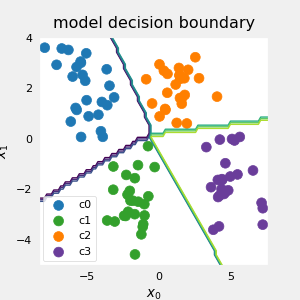

In [8]:
plt_cat_mc(X_train, y_train, model, classes)

In [9]:
l1 = model.get_layer("L1")
W1, b1 = l1.get_weights()

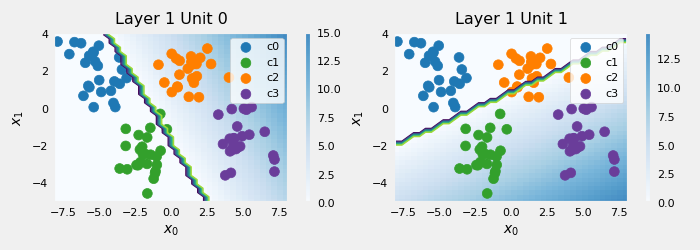

In [10]:
plt_layer_relu(X_train, y_train.reshape(-1,), W1, b1, classes)